In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# importing data
df = pd.read_csv('D:\\EXCEL R\ASSIGNMENTS\\DECISION TREE\\Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
bins = [-1,6,12,18]
Sales_Cat = ['Low','Medium','High']
df['Sales_Cat'] = pd.cut(df["Sales"],bins,labels = Sales_Cat)

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [9]:
first_column = df.pop('Sales_Cat')

In [10]:
df.insert(0, 'Sales_Cat', first_column)


In [11]:
data=df.drop('Sales',axis=1)

In [12]:
label_encoder = preprocessing.LabelEncoder()
data['Sales_Cat']= label_encoder.fit_transform(data['Sales_Cat'])

In [13]:
data_encoded=pd.get_dummies(data)

In [14]:
data_encoded.head()

,Sales_Cat,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,2,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,2,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,2,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,1,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [16]:
x=data_encoded.iloc[:,1:]
y=data_encoded['Sales_Cat']

In [17]:
x.shape , y.shape

((400, 14), (400,))

In [18]:
data['Sales_Cat'].unique()

array([2, 1, 0])

In [19]:
data.Sales_Cat.value_counts()

2    243
1    130
0     27
Name: Sales_Cat, dtype: int64

In [20]:
colnames = list(x.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [21]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

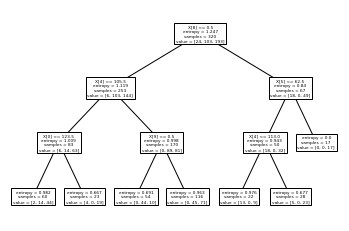

In [23]:
#PLot the decision tree
tree.plot_tree(model);

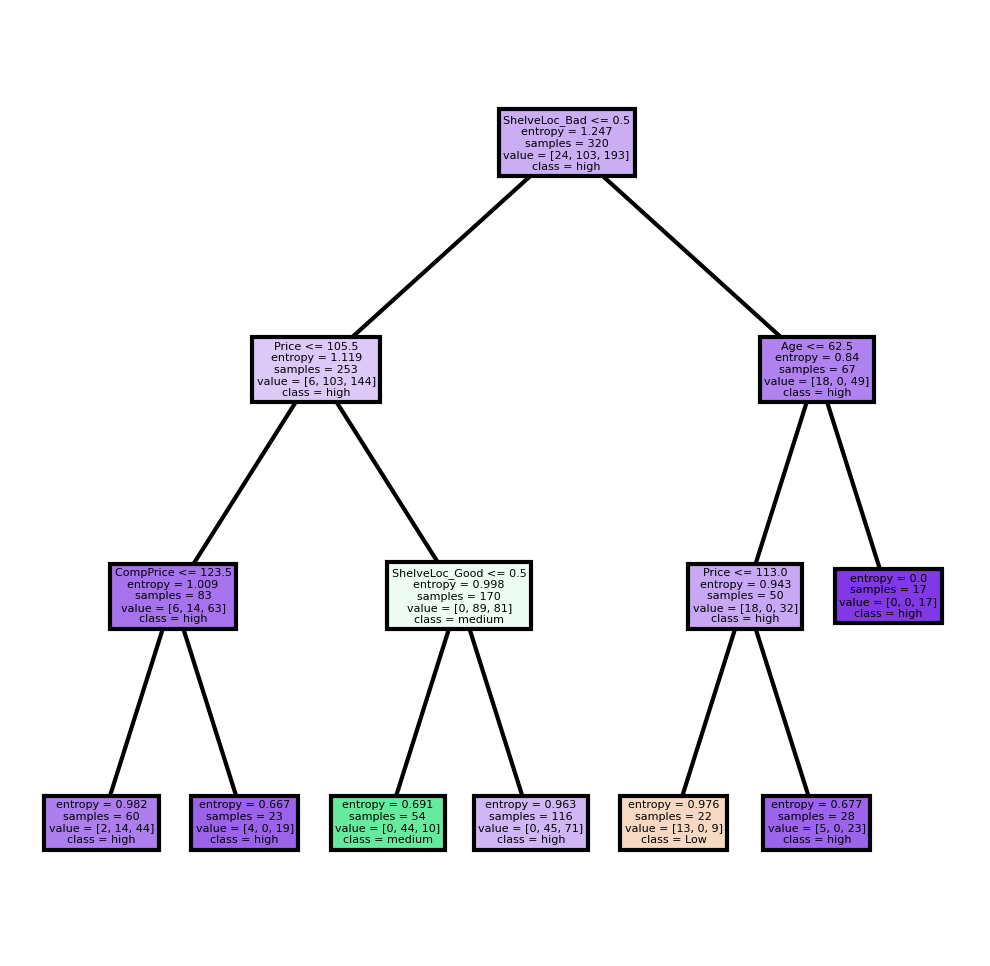

In [24]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Sales_Cat',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']
cn=['Low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
#tree.plot_tree(model,feature_names = fn,filled = True);
#tree.plot_tree(model,filled = True);

In [25]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    69
1     7
0     4
dtype: int64

In [26]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,0,1,2
Sales_Cat,,,
0,2,0,1
1,0,5,22
2,2,2,46


In [28]:
# Accuracy 
np.mean(preds==y_test)

0.6625

# Building Decision Tree Classifier (CART) using Gini Criteria¶

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.6625

# Decision Tree Regression Example¶

In [32]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [33]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
#Find the accuracy
model.score(X_test,y_test)

-1.1820807481891258